<a href="https://colab.research.google.com/github/Demesmaeker/DL-wine-quality/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


# Exploring & Reshaping the datas

## Load the dataset

In [3]:
df = pd.read_csv("wine.csv")
df.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5032,red,7.9,1.04,0.05,2.2,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
709,white,6.2,0.47,0.21,1.0,0.044,13.0,98.0,0.99345,3.14,0.46,9.2,5
3047,white,7.7,0.18,0.53,1.2,0.041,42.0,167.0,0.99080,3.11,0.44,11.9,5
4297,white,7.0,0.20,0.35,8.8,0.037,31.0,103.0,0.99388,3.13,0.49,11.0,6
1942,white,8.3,0.36,0.57,15.0,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
6040,red,6.9,0.45,0.11,2.4,0.043,6.0,12.0,0.99354,3.30,0.65,11.4,6
818,white,6.2,0.30,0.17,2.8,0.040,24.0,125.0,0.99390,3.01,0.46,9.0,5
1013,white,6.2,0.25,0.47,11.6,0.048,62.0,210.0,0.99680,3.19,0.50,9.5,5
6046,red,7.8,0.39,0.42,2.0,0.086,9.0,21.0,0.99526,3.39,0.66,11.6,6
5979,red,7.9,0.30,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7


In [4]:
print(df["type"].value_counts())
print(df["quality"].value_counts())


df.isnull().sum()

white    4898
red      1599
Name: type, dtype: int64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
print(df["type"].value_counts())
print(df["quality"].value_counts())

white    4870
red      1593
Name: type, dtype: int64
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64


## Get Dummies

In [7]:
wines = pd.get_dummies(df, columns=['type'])
wines.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
5779,7.6,0.715,0.00,2.1,0.068,30.0,35.0,0.99533,3.48,0.65,11.4,6,1,0
5472,10.6,0.340,0.49,3.2,0.078,20.0,78.0,0.99920,3.19,0.70,10.0,6,1,0
6084,6.6,0.800,0.03,7.8,0.079,6.0,12.0,0.99630,3.52,0.50,12.2,5,1,0
3555,5.8,0.140,0.15,6.1,0.042,27.0,123.0,0.99362,3.06,0.60,9.9,6,0,1
523,5.8,0.360,0.32,1.7,0.033,22.0,96.0,0.98980,3.03,0.38,11.2,6,0,1
5392,6.5,0.390,0.23,8.3,0.051,28.0,91.0,0.99520,3.44,0.55,12.1,6,1,0
3862,6.5,0.270,0.19,6.6,0.045,98.0,175.0,0.99364,3.16,0.34,10.1,6,0,1
3661,6.7,0.220,0.39,1.2,0.049,26.0,152.0,0.99346,3.50,0.47,10.0,6,0,1
973,6.5,0.080,0.33,1.9,0.028,23.0,93.0,0.99100,3.34,0.70,12.0,7,0,1
5996,8.0,0.310,0.45,2.1,0.216,5.0,16.0,0.99358,3.15,0.81,12.5,7,1,0


In [8]:
from keras.utils import to_categorical

y = to_categorical(wines.iloc[:,-3:-2].to_numpy())

In [9]:
y.shape

(6463, 10)

## Split the dataset

In [10]:
x = wines.iloc[:,:-3].join(wines['type_red'].to_frame()
                    ).join(wines['type_white'].to_frame()).to_numpy()

print(x.shape)
print(y.shape)

(6463, 13)
(6463, 10)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5170, 13)
(1293, 13)
(5170, 10)
(1293, 10)


# Building the Neural Network

## Create the Model

In [13]:
model = Sequential()

## Add the layers

In [14]:
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Flatten())
model.add(Dense(42, activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))

# Compiling the Model

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

# Training

In [16]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
162/162 [==============================] - 1s 2ms/step - loss: 4.9571 - accuracy: 0.3076
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 1.2509 - accuracy: 0.4653
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 1.3078 - accuracy: 0.4407
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 1.2287 - accuracy: 0.4658
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 1.1992 - accuracy: 0.4812
Epoch 6/100
162/162 [==============================] - 0s 2ms/step - loss: 1.2146 - accuracy: 0.4738
Epoch 7/100
162/162 [==============================] - 0s 1ms/step - loss: 1.1629 - accuracy: 0.4909
Epoch 8/100
162/162 [==============================] - 0s 2ms/step - loss: 1.1765 - accuracy: 0.4990
Epoch 9/100
162/162 [==============================] - 0s 2ms/step - loss: 1.1943 - accuracy: 0.4979
Epoch 10/100
162/162 [==============================] - 0s 2ms/step - loss: 1.1405 - accura

In [17]:
scores = model.evaluate(X_test, y_test)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

41/41 [==============================] - 0s 1ms/step - loss: 1.0623 - accuracy: 0.5514

accuracy: 55.14%


# Evaluation

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 42)                2730      
_________________________________________________________________
flatten_1 (Flatten)          (None, 42)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                688       
_________________________________________________________________
flatten_2 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(X_test)
print("Accuracy: %", accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100)

correct_preds = (y_test.argmax(axis=1) == predictions.argmax(axis=1))
print("That means that out of", y_test.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

Accuracy: % 55.1430781129157
That means that out of 1293 test samples, this model got 713 correct and 580 incorrect


## Plots

In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


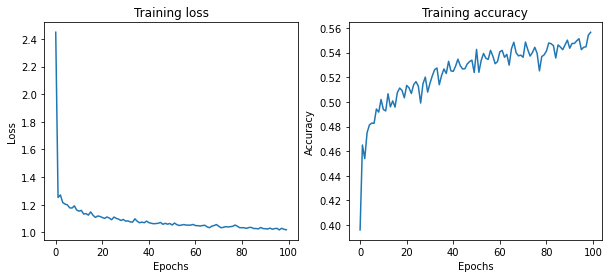

In [21]:
loss = history.history['loss']
accuracy = history.history['accuracy']

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()